In [ ]:
!pip install imbalanced-learn

Enhanced Traffic Accident Severity Prediction System
With Academic Visualizations for Research Papers

Data Loading Options:
1. Use sample data (100k rows - recommended for testing)
2. Use full dataset (slower but complete analysis)
Enter your choice (1 or 2, default is 1): 2
Loading data...
Loading full dataset...
Load complete: 1741433 rows, 46 columns


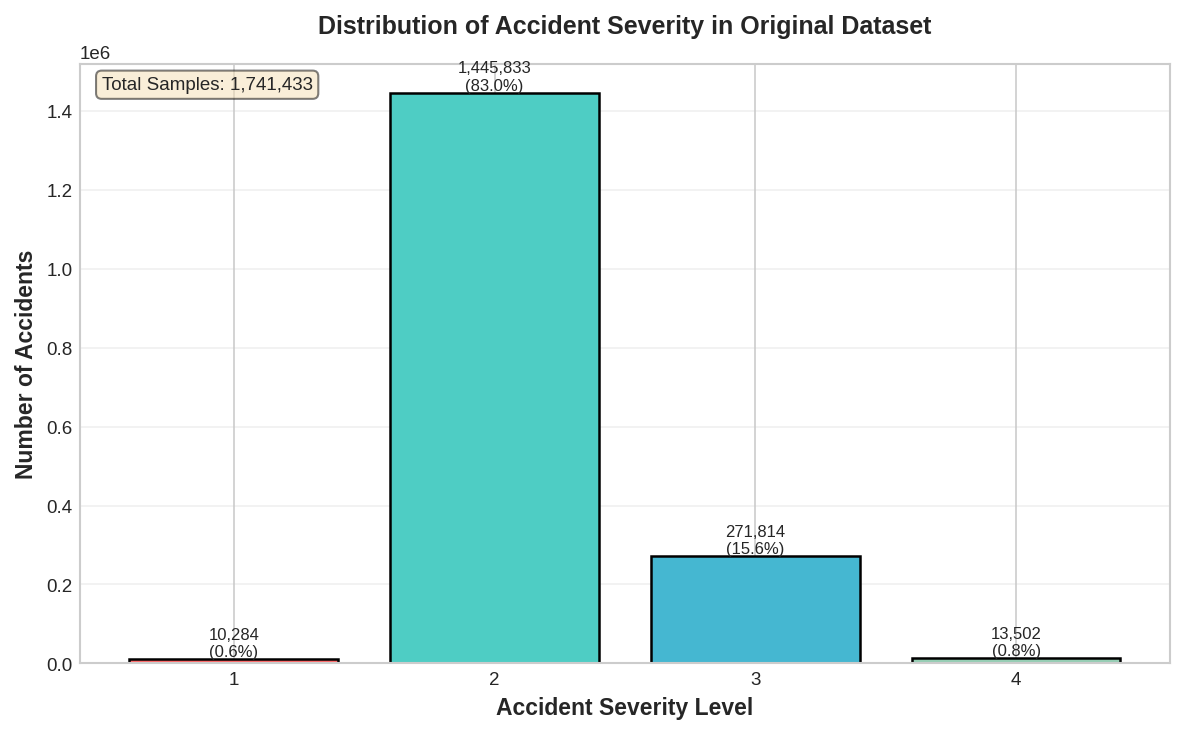


Original Severity Distribution:
Severity 1: 10,284 (0.59%)
Severity 2: 1,445,833 (83.03%)
Severity 3: 271,814 (15.61%)
Severity 4: 13,502 (0.78%)

Starting data preprocessing...

Before Preprocessing - Data Quality Analysis


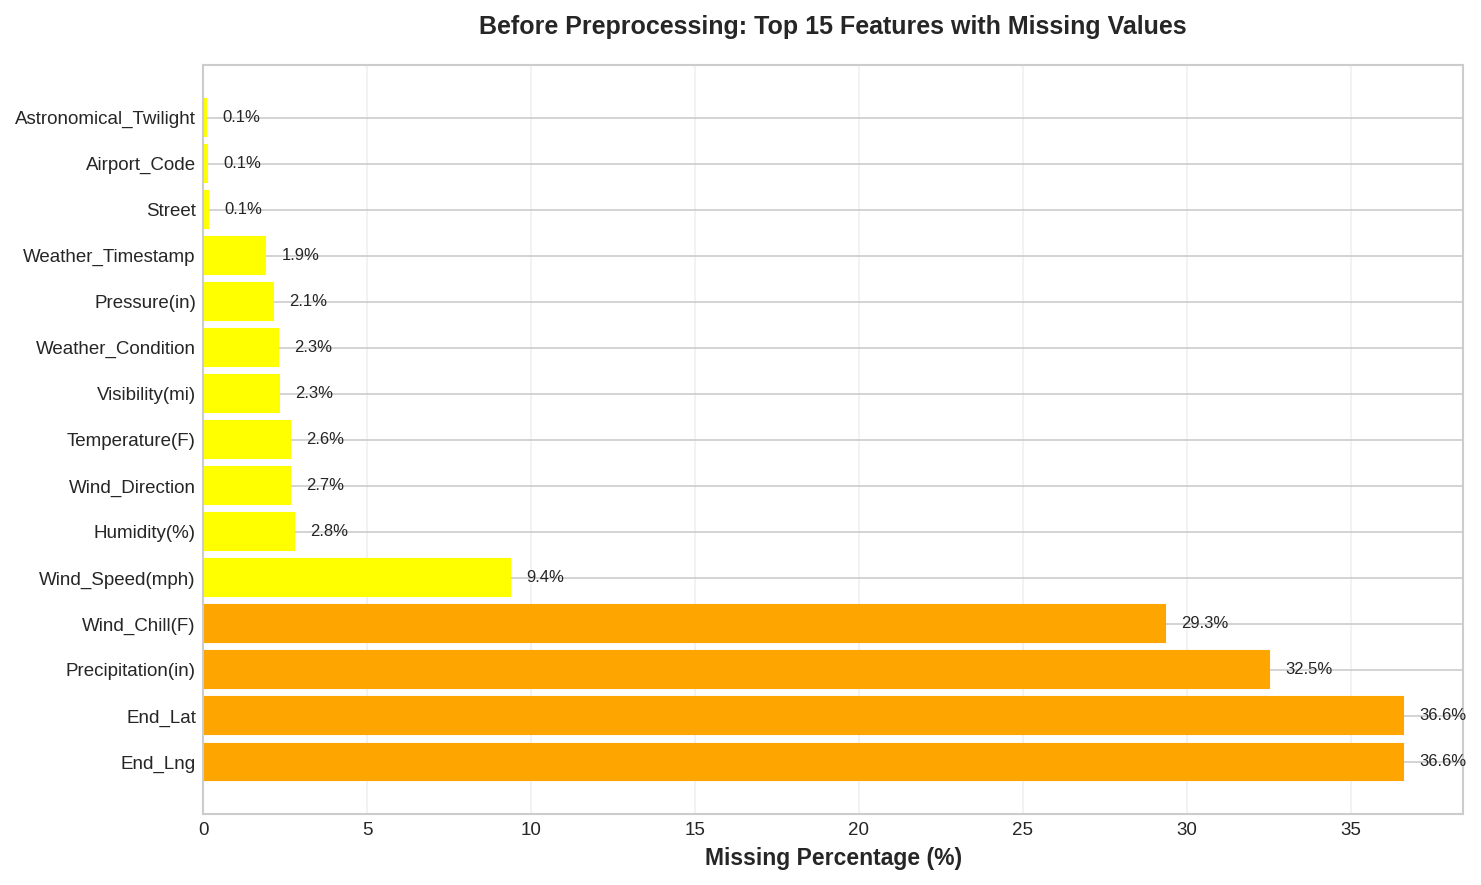


Data Types Distribution:
----------------------------------------
object                  20 columns
bool                    13 columns
float64                 12 columns
int64                    1 columns

Total Memory Usage: 2445.03 MB

Removed 9 invalid features: ['ID', 'Distance(mi)', 'End_Time', 'End_Lat', 'End_Lng', 'Description', 'Street', 'Wind_Chill(F)', 'Source']
Extracting time features...


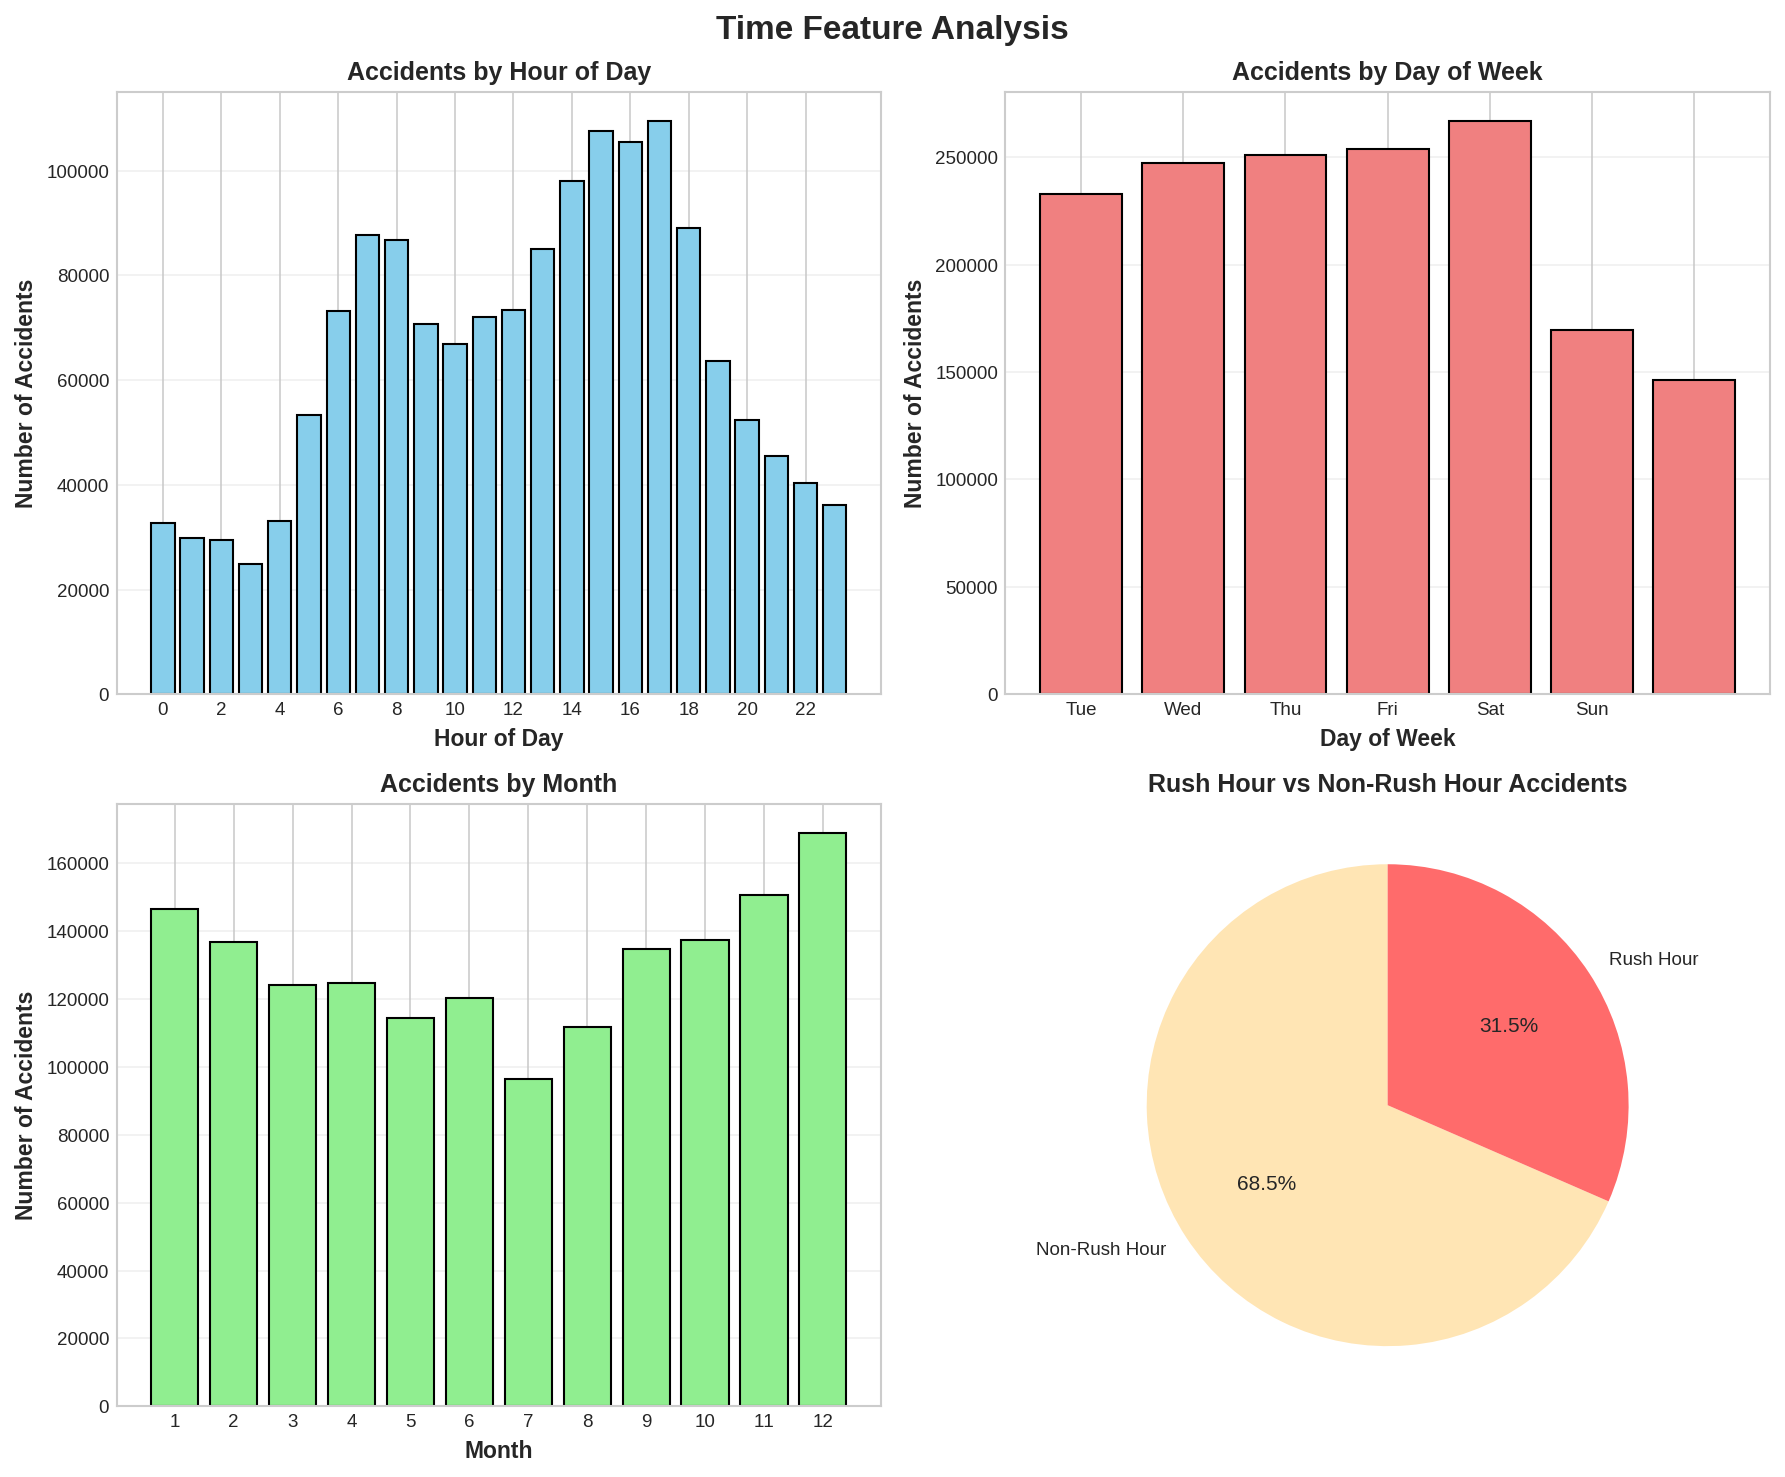

Cleaning categorical features...


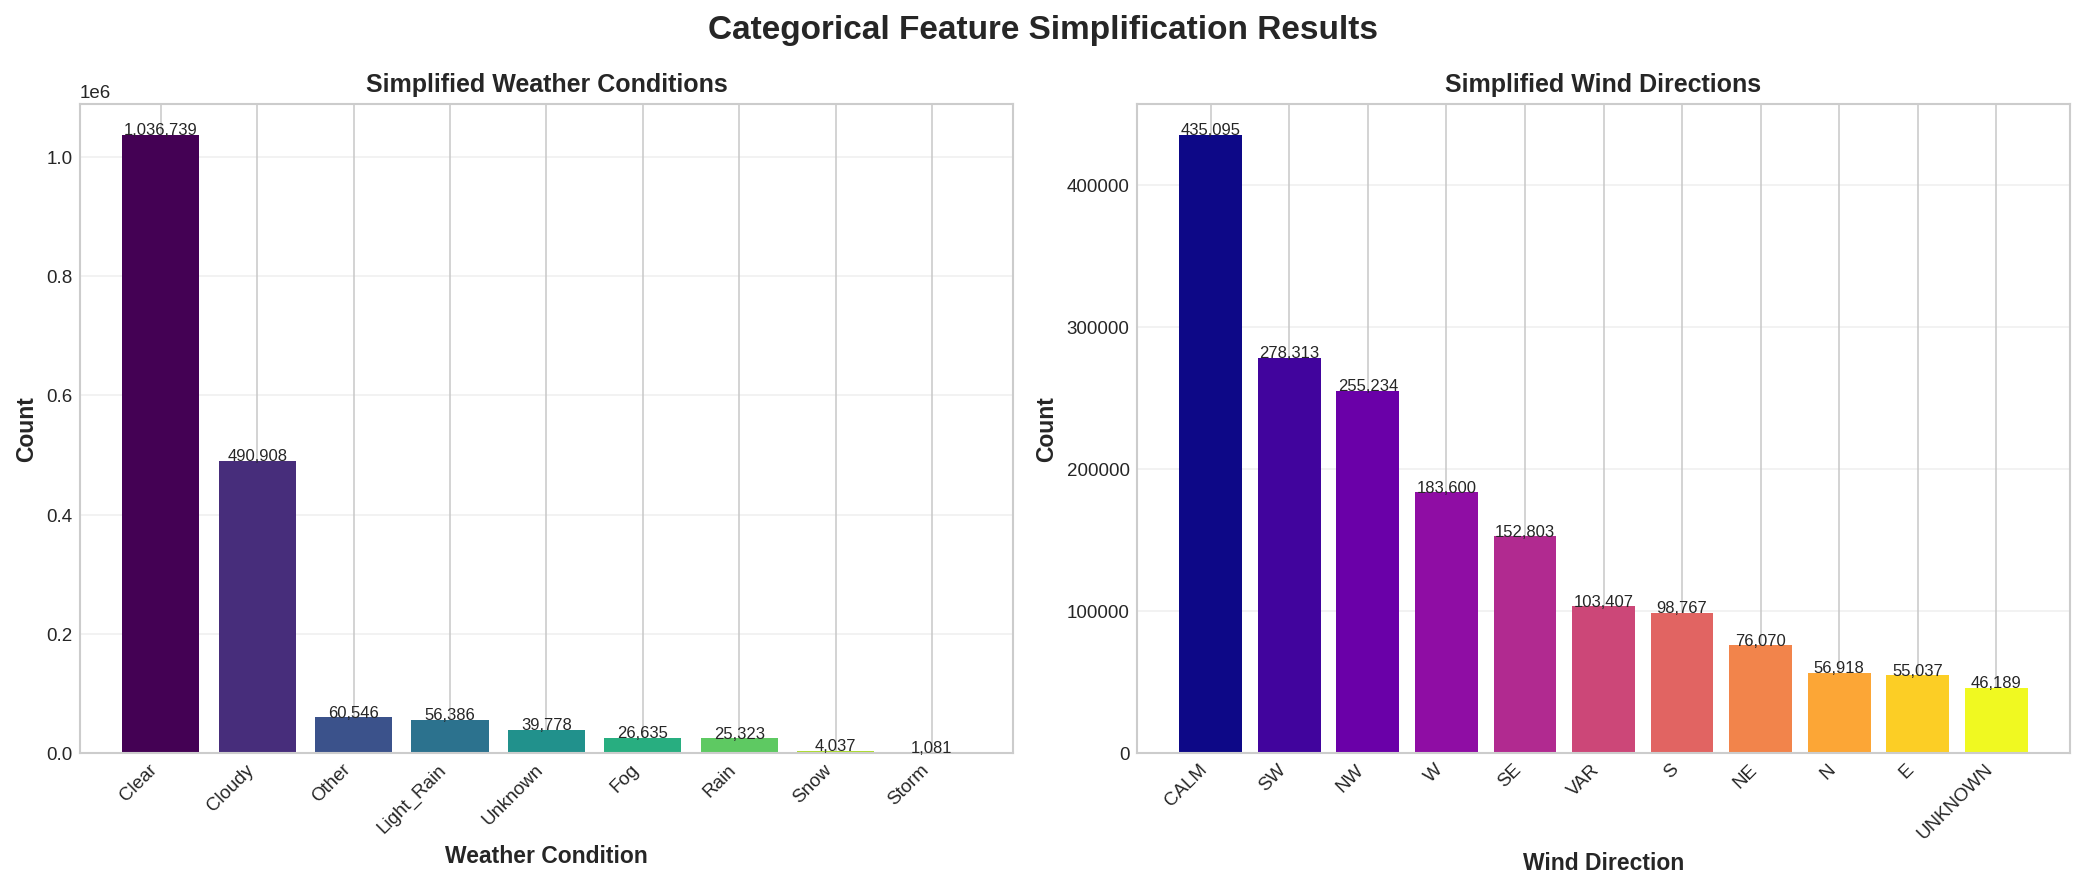

Handling missing values...

After Preprocessing - Data Quality Analysis


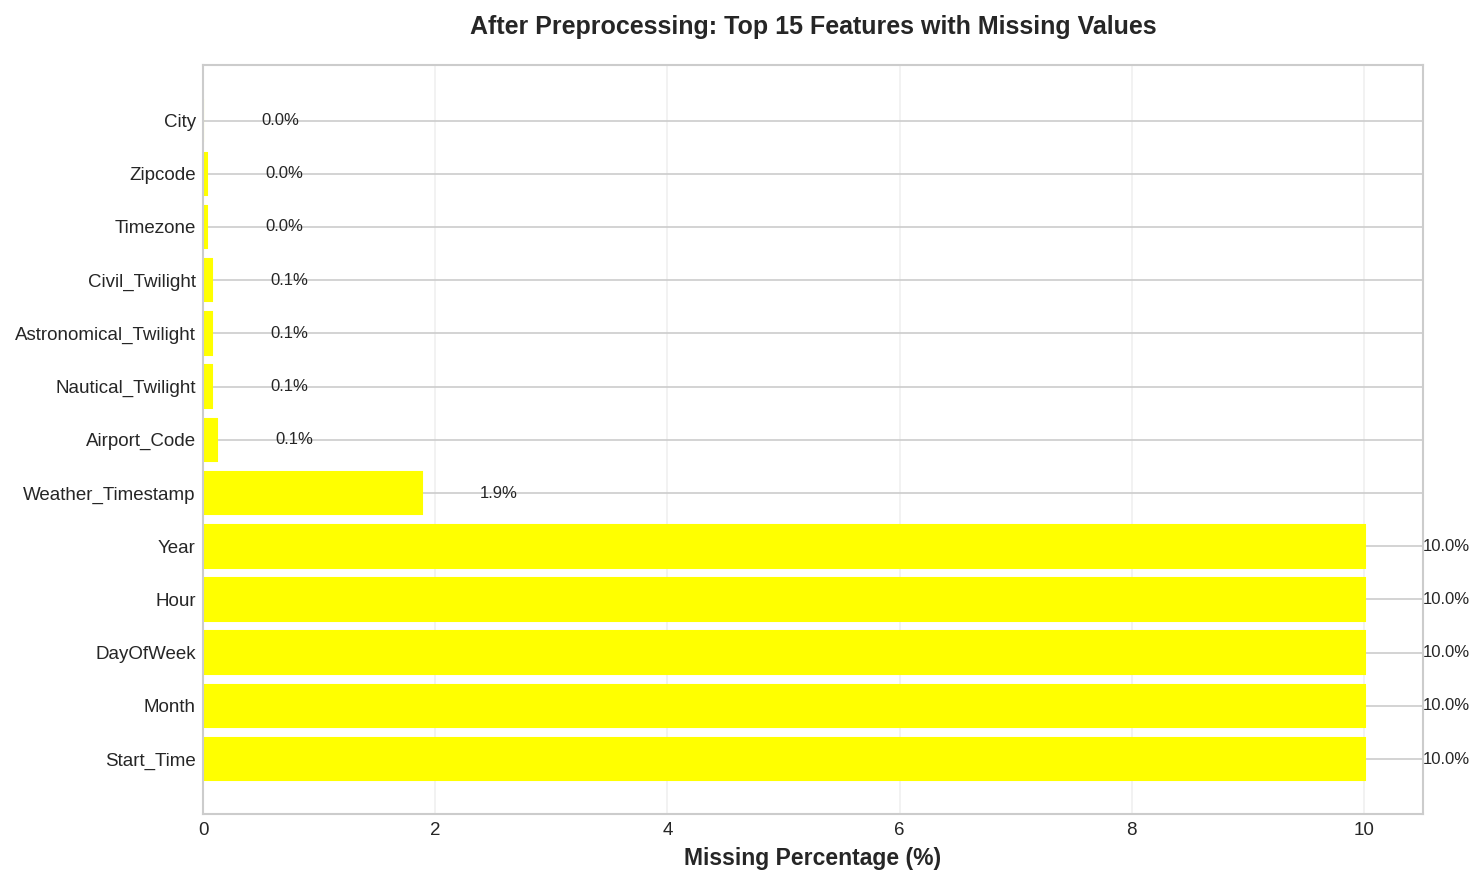


Data Types Distribution:
----------------------------------------
int64                   17 columns
object                  14 columns
float64                 12 columns
datetime64[ns]           1 columns

Total Memory Usage: 1861.57 MB

Preprocessing Summary:
           Metric    Before     After
       Total Rows 1,741,433 1,741,433
    Total Columns        46        44
   Missing Values 2,816,193   911,640
Memory Usage (MB)   1861.57   1861.57
Summary saved to: preprocessing_summary.csv

Preprocessing complete: 1741433 valid data rows

Preparing feature matrix...

Feature Summary Table:
                  Feature                Type  Unique_Values   Min     Max  Mean  Missing
                     Hour           Numerical             24   0.0   23.00 11.18        0
                DayOfWeek Boolean/Categorical              7   0.0    6.00  2.47        0
                    Month           Numerical             13   0.0   12.00  5.99        0
           Temperature(F)           Numer

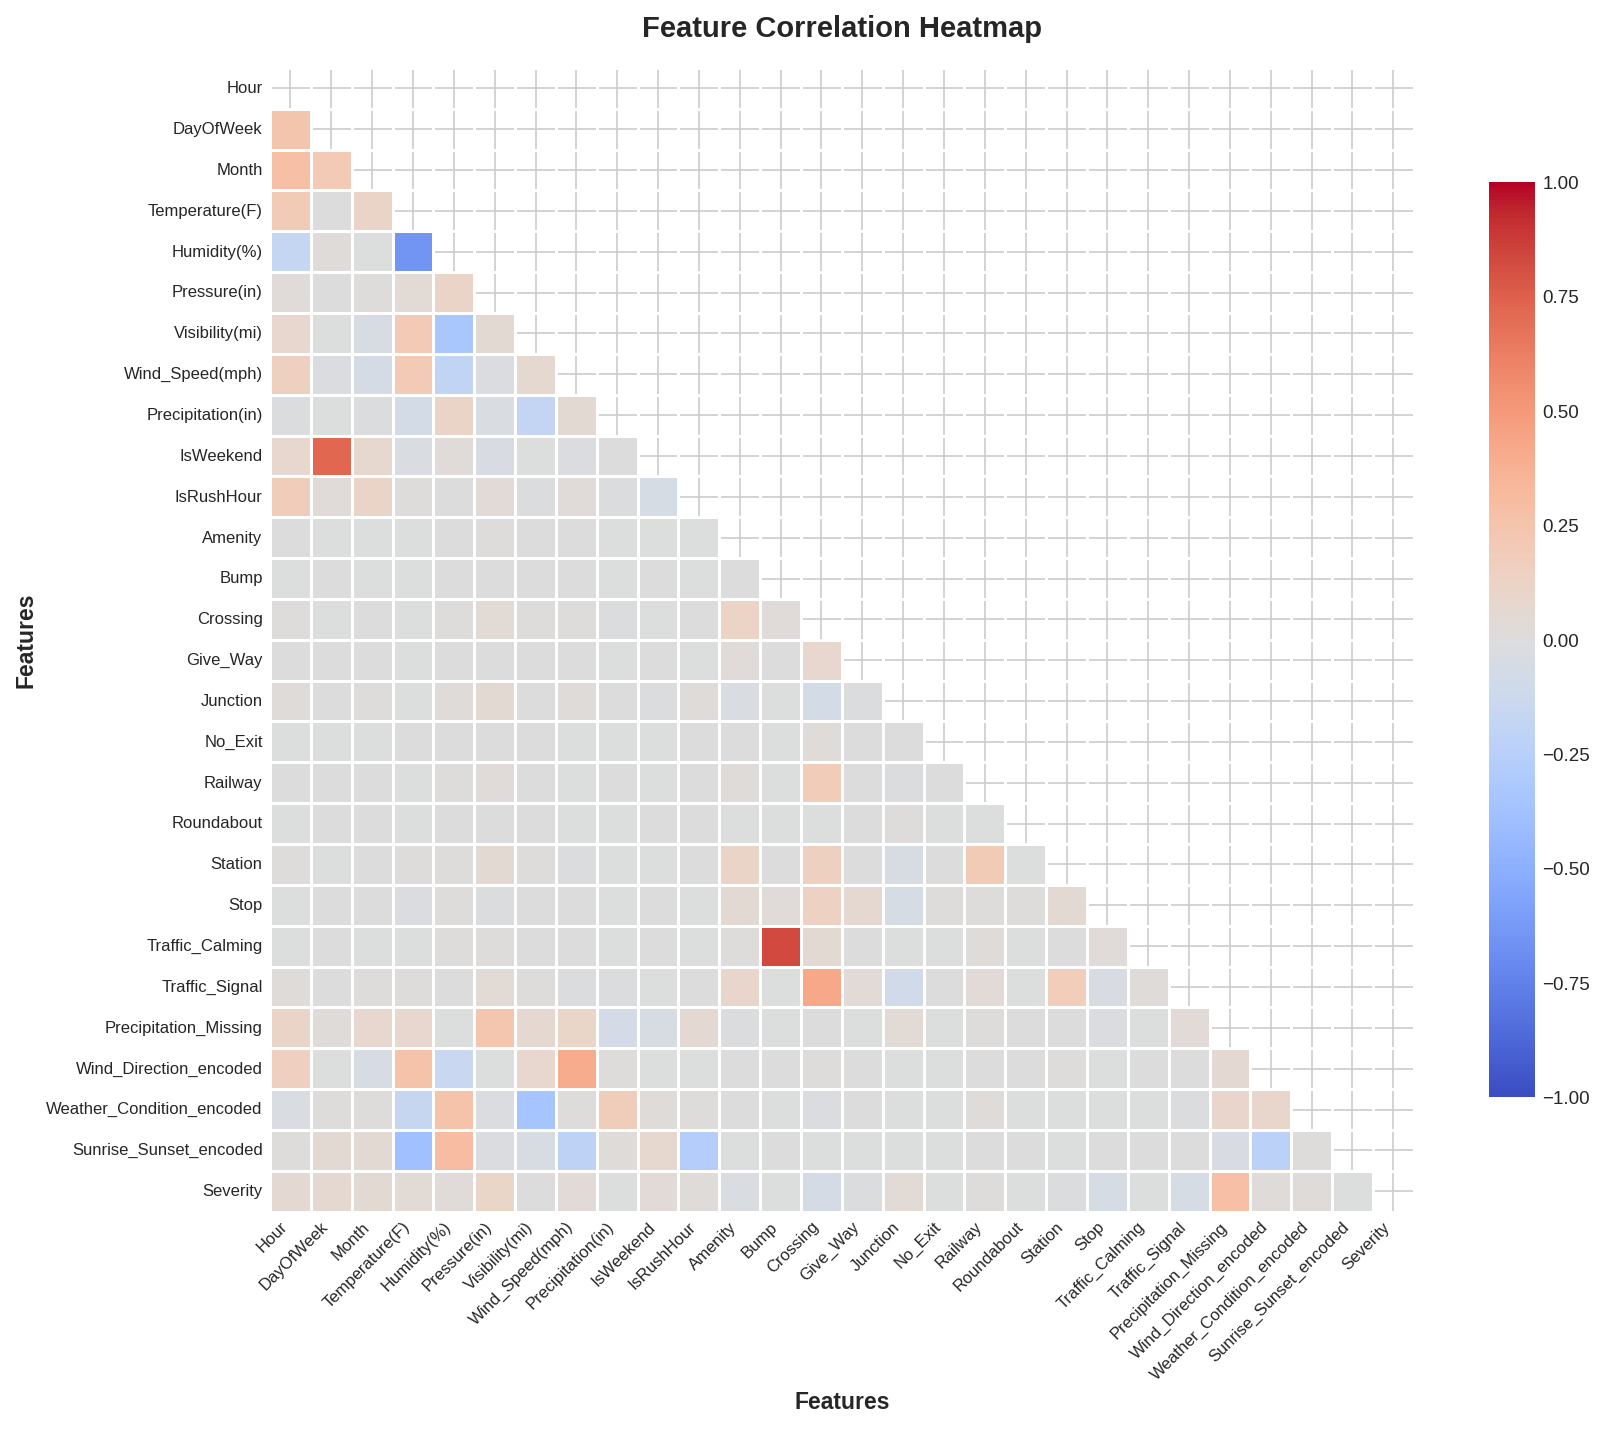


Top 10 Features Correlated with Severity:
--------------------------------------------------
 1. Precipitation_Missing           0.282
 2. Pressure(in)                    0.102
 3. DayOfWeek                       0.065
 4. Hour                            0.062
 5. Month                           0.053
 6. Temperature(F)                  0.046
 7. Junction                        0.040
 8. IsWeekend                       0.039
 9. Wind_Speed(mph)                 0.037
10. Humidity(%)                     0.027
Number of features: 28
Number of samples: 1741433

Starting Random Forest model training...

Data balancing using SMOTE...


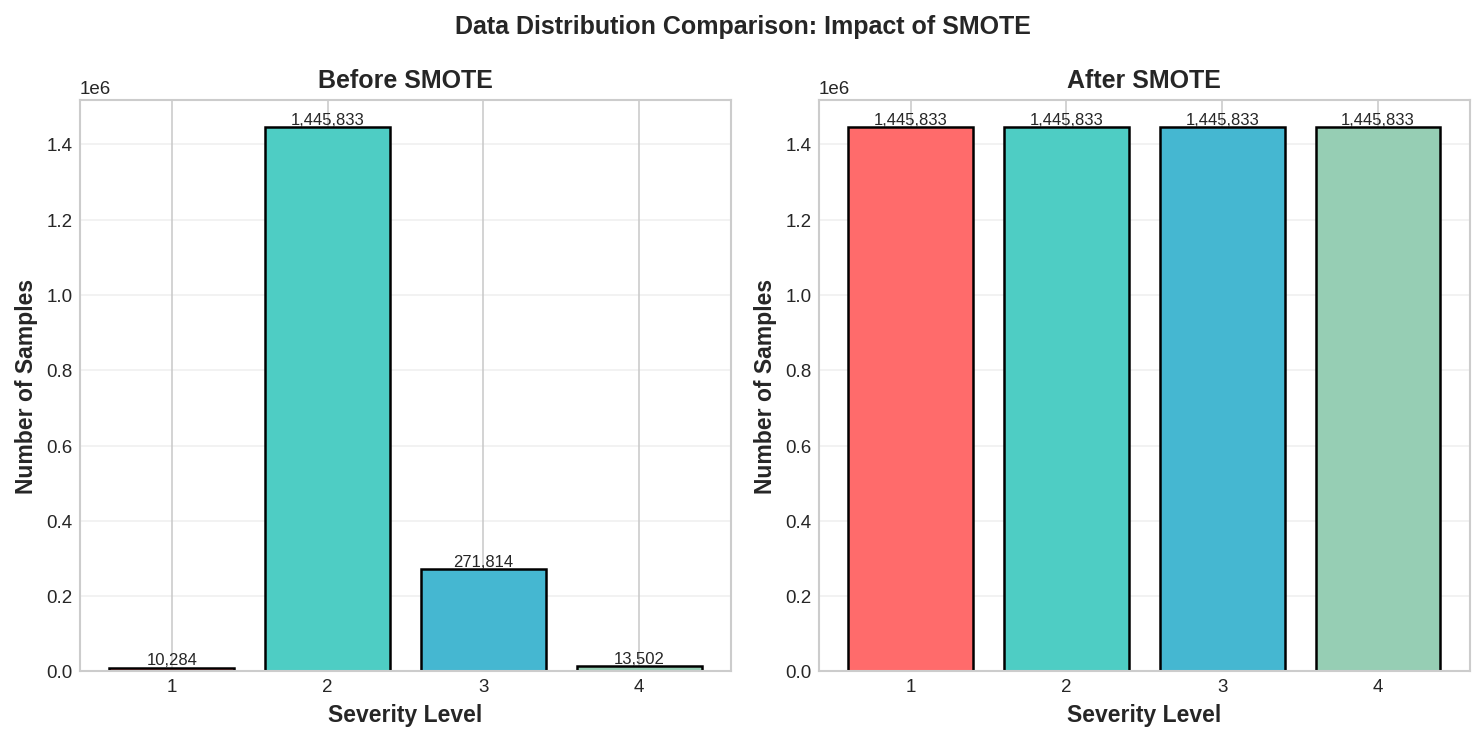


SMOTE Effect Analysis:
--------------------------------------------------
Severity   Original     Balanced     Change    
--------------------------------------------------
1          10,284       1,445,833     +13959.1%
2          1,445,833    1,445,833         +0.0%
3          271,814      1,445,833       +431.9%
4          13,502       1,445,833     +10608.3%
Training set: 4626665 samples
Test set: 1156667 samples
Training Random Forest model...

Model Performance Metrics
Accuracy: 0.7908 (79.08%)
Weighted F1 Score: 0.7888

Detailed Classification Report:
              precision    recall  f1-score   support

           1     0.7360    0.9825    0.8415    289167
           2     0.8256    0.7371    0.7788    289166
           3     0.7289    0.6954    0.7118    289167
           4     0.9145    0.7481    0.8230    289167

    accuracy                         0.7908   1156667
   macro avg     0.8012    0.7908    0.7888   1156667
weighted avg     0.8012    0.7908    0.7888   1156667


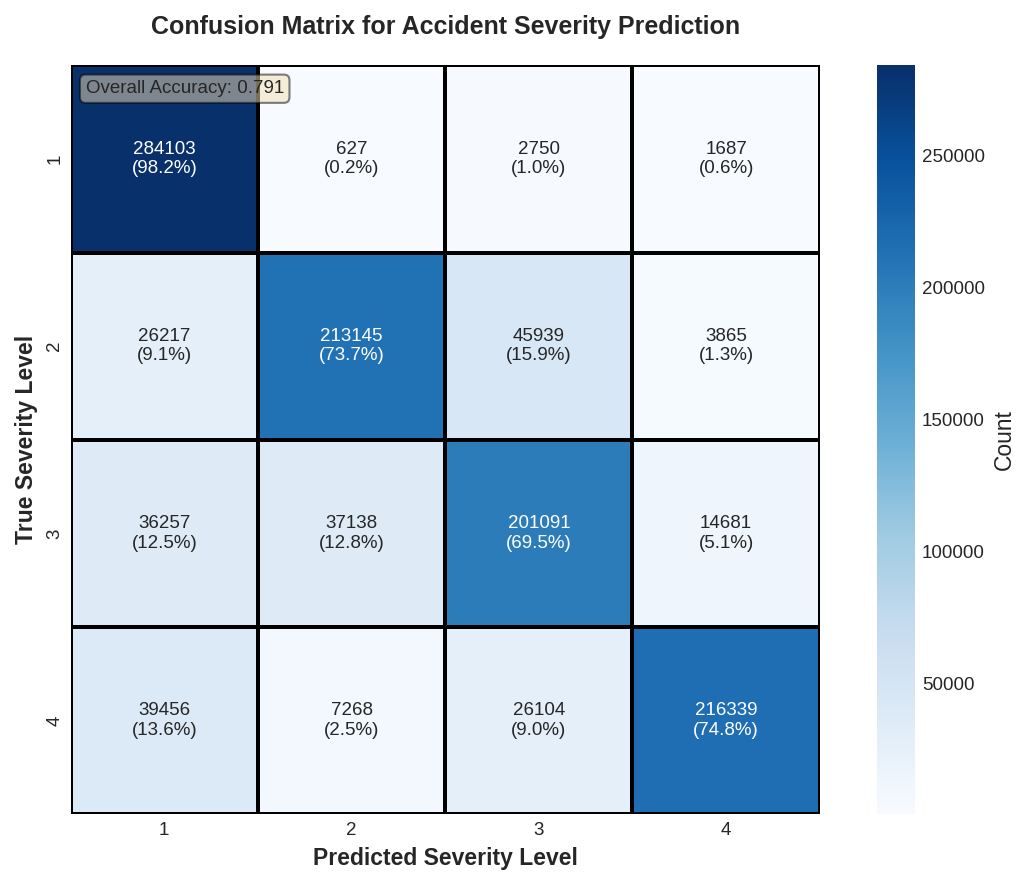

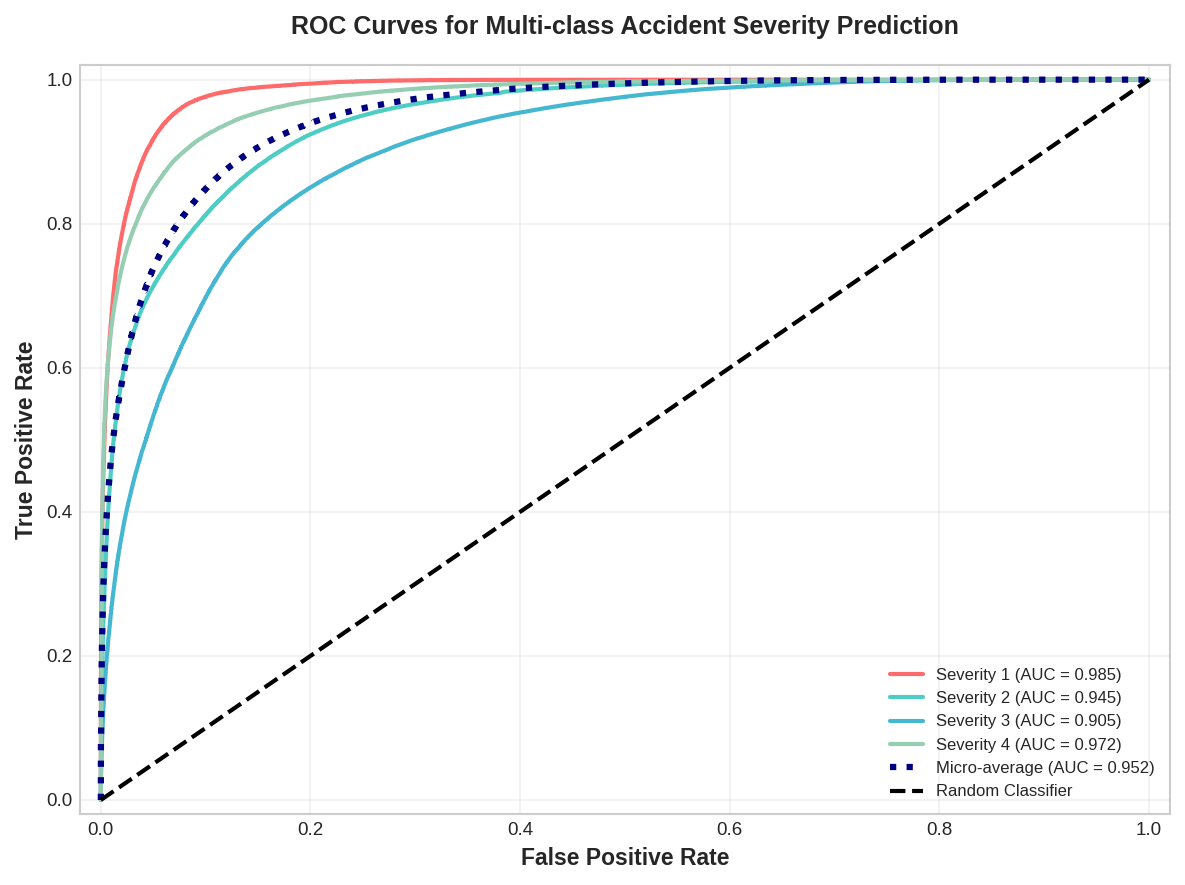


ROC-AUC Scores:
----------------------------------------
Severity 1: 0.9847
Severity 2: 0.9450
Severity 3: 0.9051
Severity 4: 0.9725
Micro-average: 0.9520


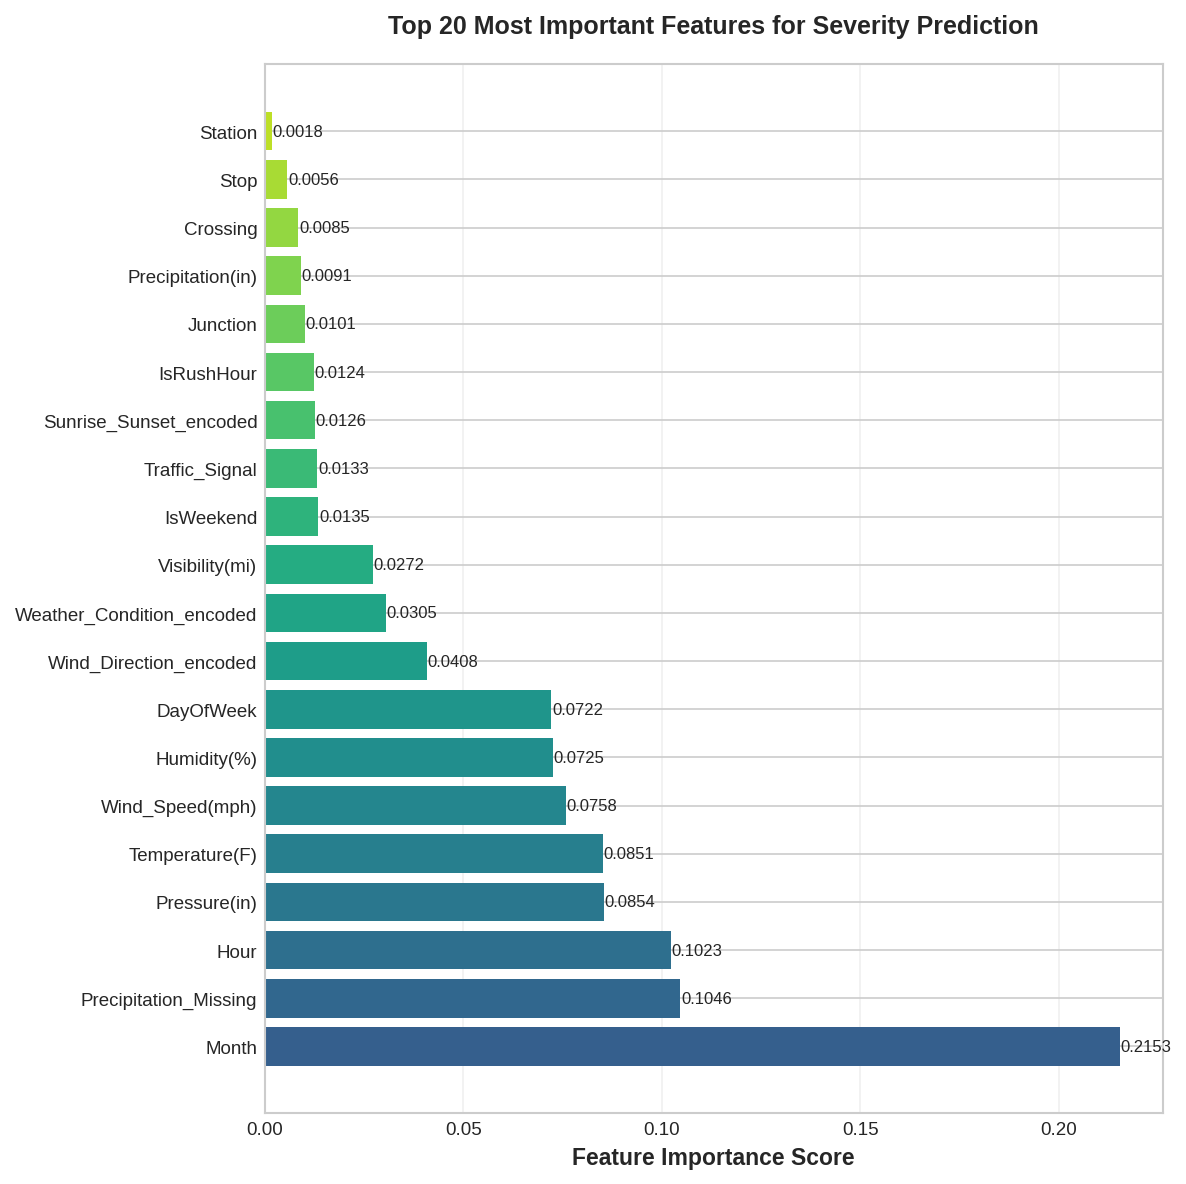


Feature Importance Analysis:
------------------------------------------------------------
Rank   Feature                        Importance Cumulative
------------------------------------------------------------
1      Month                          0.2153     0.2153    
2      Precipitation_Missing          0.1046     0.3200    
3      Hour                           0.1023     0.4222    
4      Pressure(in)                   0.0854     0.5077    
5      Temperature(F)                 0.0851     0.5928    
6      Wind_Speed(mph)                0.0758     0.6686    
7      Humidity(%)                    0.0725     0.7411    
8      DayOfWeek                      0.0722     0.8133    
9      Wind_Direction_encoded         0.0408     0.8541    
10     Weather_Condition_encoded      0.0305     0.8845    
11     Visibility(mi)                 0.0272     0.9117    
12     IsWeekend                      0.0135     0.9253    
13     Traffic_Signal                 0.0133     0.9385    
14     S

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                           f1_score, roc_curve, auc, roc_auc_score)
from sklearn.preprocessing import LabelEncoder, label_binarize
import joblib
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier


#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Enhanced Traffic Accident Severity Prediction with Academic Visualizations
- Original data distribution visualization
- SMOTE before/after comparison
- ROC curves for multi-class classification
- Enhanced confusion matrix
- Feature correlation heatmap
- Feature importance analysis
- Data preprocessing visualizations
- Feature engineering visualizations
"""



# Set style for academic papers
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 150  # Reduced DPI for better display
plt.rcParams['savefig.dpi'] = 300  # Keep high DPI for saved files
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['figure.titlesize'] = 14

# Data balancing libraries
try:
    from imblearn.over_sampling import SMOTE
    IMBLEARN_AVAILABLE = True
except ImportError:
    print("Error: imblearn library not installed, which is required for SMOTE balancing")
    print("Please run: pip install imbalanced-learn")
    IMBLEARN_AVAILABLE = False
    raise ImportError("imblearn is required for this version")

class AccidentSeverityPredictor:
    """
    Enhanced Traffic Accident Severity Prediction System with Academic Visualizations
    """

    def __init__(self):
        """Initialize predictor"""
        self.model = None
        self.feature_columns = None
        self.label_encoders = {}
        self.X_test = None  # Store for later visualization
        self.y_test = None
        self.y_pred = None
        self.y_pred_proba = None

    def load_data(self, file_path, sample_size=None):
        """
        Load data and create initial distribution visualization
        """
        print("Loading data...")

        if sample_size:
            print(f"Sampling first {sample_size} rows...")
            df = pd.read_csv(file_path, nrows=sample_size)
        else:
            print("Loading full dataset...")
            df = pd.read_csv(file_path)

        print(f"Load complete: {len(df)} rows, {len(df.columns)} columns")

        # Visualize original severity distribution
        if 'Severity' in df.columns:
            self._plot_original_distribution(df)

        return df

    def _plot_original_distribution(self, df):
        """
        Plot original accident severity distribution
        """
        plt.figure(figsize=(8, 5))  # Reduced size

        severity_counts = df['Severity'].value_counts().sort_index()

        # Create bar plot
        bars = plt.bar(severity_counts.index, severity_counts.values,
                       color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'],
                       edgecolor='black', linewidth=1.2)

        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}\n({height/len(df)*100:.1f}%)',
                    ha='center', va='bottom', fontsize=8)

        plt.xlabel('Accident Severity Level', fontweight='bold')
        plt.ylabel('Number of Accidents', fontweight='bold')
        plt.title('Distribution of Accident Severity in Original Dataset', fontweight='bold', pad=15)
        plt.xticks([1, 2, 3, 4])
        plt.grid(axis='y', alpha=0.3)

        # Add total sample size
        plt.text(0.02, 0.98, f'Total Samples: {len(df):,}',
                transform=plt.gca().transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                fontsize=9)

        plt.tight_layout()
        plt.savefig('original_severity_distribution.png', bbox_inches='tight', dpi=300)
        plt.show()

        print("\nOriginal Severity Distribution:")
        for severity, count in severity_counts.items():
            percentage = (count / len(df)) * 100
            print(f"Severity {severity}: {count:,} ({percentage:.2f}%)")

    def _visualize_data_quality(self, df, stage_name):
        """
        Visualize data quality: missing values, data types, etc.
        """
        print(f"\n{stage_name} - Data Quality Analysis")
        print("="*60)

        # Missing values analysis
        missing_data = pd.DataFrame({
            'Column': df.columns,
            'Missing_Count': df.isnull().sum(),
            'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
        }).sort_values('Missing_Percentage', ascending=False)

        # Filter columns with missing values
        missing_data = missing_data[missing_data['Missing_Count'] > 0]

        if len(missing_data) > 0:
            # Plot missing values
            plt.figure(figsize=(10, 6))
            bars = plt.barh(missing_data['Column'][:15], missing_data['Missing_Percentage'][:15])

            # Color bars based on severity
            colors = ['red' if x > 50 else 'orange' if x > 20 else 'yellow' for x in missing_data['Missing_Percentage'][:15]]
            for bar, color in zip(bars, colors):
                bar.set_color(color)

            plt.xlabel('Missing Percentage (%)', fontweight='bold')
            plt.title(f'{stage_name}: Top 15 Features with Missing Values', fontweight='bold', pad=15)
            plt.grid(axis='x', alpha=0.3)

            # Add percentage labels
            for i, (idx, row) in enumerate(missing_data[:15].iterrows()):
                plt.text(row['Missing_Percentage'] + 0.5, i, f"{row['Missing_Percentage']:.1f}%",
                        va='center', fontsize=8)

            plt.tight_layout()
            plt.savefig(f'{stage_name.lower().replace(" ", "_")}_missing_values.png', dpi=300, bbox_inches='tight')
            plt.show()

        # Data types summary
        dtype_counts = df.dtypes.value_counts()
        print("\nData Types Distribution:")
        print("-"*40)
        for dtype, count in dtype_counts.items():
            print(f"{str(dtype):<20} {count:>5} columns")

        # Memory usage
        memory_usage = df.memory_usage(deep=True).sum() / 1024**2  # MB
        print(f"\nTotal Memory Usage: {memory_usage:.2f} MB")

        return missing_data

    def preprocess_data(self, df):
        """
        Data preprocessing with before/after visualization
        """
        print("\nStarting data preprocessing...")

        # Capture initial state
        initial_shape = df.shape
        initial_missing = df.isnull().sum().sum()

        # Visualize initial data quality
        self._visualize_data_quality(df.copy(), "Before Preprocessing")

        # Remove invalid features
        ineffective_features = [
            'ID', 'Distance(mi)', 'End_Time', 'End_Lat', 'End_Lng',
            'Description', 'Street', 'Number', 'Wind_Chill(F)', 'Source'
        ]

        existing_features = [f for f in ineffective_features if f in df.columns]
        df = df.drop(columns=existing_features)
        print(f"\nRemoved {len(existing_features)} invalid features: {existing_features}")

        # Time feature engineering
        df = self._extract_time_features(df)

        # Clean categorical features
        df = self._clean_categorical_features(df)

        # Handle missing values
        df = self._handle_missing_values(df)

        # Filter invalid records
        df = df.dropna(subset=['Severity'])
        df = df[df['Severity'].isin([1, 2, 3, 4])]

        # Visualize after preprocessing
        self._visualize_data_quality(df.copy(), "After Preprocessing")

        # Create preprocessing summary
        self._create_preprocessing_summary(initial_shape, initial_missing, df)

        print(f"\nPreprocessing complete: {len(df)} valid data rows")
        return df

    def _create_preprocessing_summary(self, initial_shape, initial_missing, df_processed):
        """
        Create a summary table of preprocessing steps
        """
        summary_data = {
            'Metric': ['Total Rows', 'Total Columns', 'Missing Values', 'Memory Usage (MB)'],
            'Before': [
                f"{initial_shape[0]:,}",
                initial_shape[1],
                f"{initial_missing:,}",
                f"{df_processed.memory_usage(deep=True).sum() / 1024**2:.2f}"
            ],
            'After': [
                f"{df_processed.shape[0]:,}",
                df_processed.shape[1],
                f"{df_processed.isnull().sum().sum():,}",
                f"{df_processed.memory_usage(deep=True).sum() / 1024**2:.2f}"
            ]
        }

        summary_df = pd.DataFrame(summary_data)

        print("\nPreprocessing Summary:")
        print("="*60)
        print(summary_df.to_string(index=False))
        print("="*60)

        # Save summary
        summary_df.to_csv('preprocessing_summary.csv', index=False)
        print("Summary saved to: preprocessing_summary.csv")

    def _extract_time_features(self, df):
        """Extract time features with visualization"""
        print("Extracting time features...")

        df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

        df['Hour'] = df['Start_Time'].dt.hour
        df['DayOfWeek'] = df['Start_Time'].dt.dayofweek
        df['Month'] = df['Start_Time'].dt.month
        df['Year'] = df['Start_Time'].dt.year

        df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int)
        df['IsRushHour'] = ((df['Hour'].between(7, 9)) |
                           (df['Hour'].between(16, 18))).astype(int)

        # Visualize time features
        self._visualize_time_features(df)

        return df

    def _visualize_time_features(self, df):
        """
        Visualize extracted time features
        """
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))

        # Hour distribution
        ax1 = axes[0, 0]
        hour_counts = df['Hour'].value_counts().sort_index()
        ax1.bar(hour_counts.index, hour_counts.values, color='skyblue', edgecolor='black')
        ax1.set_xlabel('Hour of Day', fontweight='bold')
        ax1.set_ylabel('Number of Accidents', fontweight='bold')
        ax1.set_title('Accidents by Hour of Day', fontweight='bold')
        ax1.set_xticks(range(0, 24, 2))
        ax1.grid(axis='y', alpha=0.3)

        # Day of week distribution
        ax2 = axes[0, 1]
        day_counts = df['DayOfWeek'].value_counts().sort_index()
        days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
        ax2.bar(day_counts.index, day_counts.values, color='lightcoral', edgecolor='black')
        ax2.set_xlabel('Day of Week', fontweight='bold')
        ax2.set_ylabel('Number of Accidents', fontweight='bold')
        ax2.set_title('Accidents by Day of Week', fontweight='bold')
        ax2.set_xticklabels(days)
        ax2.grid(axis='y', alpha=0.3)

        # Month distribution
        ax3 = axes[1, 0]
        month_counts = df['Month'].value_counts().sort_index()
        ax3.bar(month_counts.index, month_counts.values, color='lightgreen', edgecolor='black')
        ax3.set_xlabel('Month', fontweight='bold')
        ax3.set_ylabel('Number of Accidents', fontweight='bold')
        ax3.set_title('Accidents by Month', fontweight='bold')
        ax3.set_xticks(range(1, 13))
        ax3.grid(axis='y', alpha=0.3)

        # Rush hour vs non-rush hour
        ax4 = axes[1, 1]
        rush_hour_counts = df['IsRushHour'].value_counts()
        labels = ['Non-Rush Hour', 'Rush Hour']
        colors = ['#FFE5B4', '#FF6B6B']
        wedges, texts, autotexts = ax4.pie(rush_hour_counts.values, labels=labels, colors=colors,
                                           autopct='%1.1f%%', startangle=90)
        ax4.set_title('Rush Hour vs Non-Rush Hour Accidents', fontweight='bold')

        plt.suptitle('Time Feature Analysis', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig('time_features_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

    def _clean_categorical_features(self, df):
        """Clean categorical features with visualization"""
        print("Cleaning categorical features...")

        def simplify_wind_direction(direction):
            if pd.isnull(direction):
                return 'UNKNOWN'

            direction = str(direction).upper().strip()

            if direction in ['CALM', 'C']:
                return 'CALM'
            elif direction in ['VARIABLE', 'VAR', 'V']:
                return 'VAR'
            elif direction in ['N', 'NORTH']:
                return 'N'
            elif direction in ['S', 'SOUTH']:
                return 'S'
            elif direction in ['E', 'EAST']:
                return 'E'
            elif direction in ['W', 'WEST']:
                return 'W'
            elif 'NE' in direction:
                return 'NE'
            elif 'NW' in direction:
                return 'NW'
            elif 'SE' in direction:
                return 'SE'
            elif 'SW' in direction:
                return 'SW'
            else:
                return 'OTHER'

        if 'Wind_Direction' in df.columns:
            # Store original for comparison
            original_wind = df['Wind_Direction'].value_counts()
            df['Wind_Direction'] = df['Wind_Direction'].apply(simplify_wind_direction)
            simplified_wind = df['Wind_Direction'].value_counts()

        def simplify_weather_condition(condition):
            if pd.isnull(condition):
                return 'Unknown'

            condition = str(condition).lower()

            if any(word in condition for word in ['fair', 'clear']):
                return 'Clear'
            elif any(word in condition for word in ['cloud', 'overcast']):
                return 'Cloudy'
            elif 'rain' in condition and 'light' not in condition:
                return 'Rain'
            elif any(word in condition for word in ['light rain', 'drizzle']):
                return 'Light_Rain'
            elif 'snow' in condition:
                return 'Snow'
            elif any(word in condition for word in ['fog', 'mist']):
                return 'Fog'
            elif any(word in condition for word in ['thunder', 'storm']):
                return 'Storm'
            else:
                return 'Other'

        if 'Weather_Condition' in df.columns:
            # Store original for comparison
            original_weather = df['Weather_Condition'].value_counts()
            df['Weather_Condition'] = df['Weather_Condition'].apply(simplify_weather_condition)
            simplified_weather = df['Weather_Condition'].value_counts()

        # Visualize categorical simplification
        self._visualize_categorical_simplification(df)

        return df

    def _visualize_categorical_simplification(self, df):
        """
        Visualize the results of categorical feature simplification
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Weather condition distribution
        if 'Weather_Condition' in df.columns:
            weather_counts = df['Weather_Condition'].value_counts()
            ax1.bar(range(len(weather_counts)), weather_counts.values,
                   color=plt.cm.viridis(np.linspace(0, 1, len(weather_counts))))
            ax1.set_xticks(range(len(weather_counts)))
            ax1.set_xticklabels(weather_counts.index, rotation=45, ha='right')
            ax1.set_xlabel('Weather Condition', fontweight='bold')
            ax1.set_ylabel('Count', fontweight='bold')
            ax1.set_title('Simplified Weather Conditions', fontweight='bold')
            ax1.grid(axis='y', alpha=0.3)

            # Add count labels
            for i, count in enumerate(weather_counts.values):
                ax1.text(i, count + 100, f'{count:,}', ha='center', fontsize=8)

        # Wind direction distribution
        if 'Wind_Direction' in df.columns:
            wind_counts = df['Wind_Direction'].value_counts()
            ax2.bar(range(len(wind_counts)), wind_counts.values,
                   color=plt.cm.plasma(np.linspace(0, 1, len(wind_counts))))
            ax2.set_xticks(range(len(wind_counts)))
            ax2.set_xticklabels(wind_counts.index, rotation=45, ha='right')
            ax2.set_xlabel('Wind Direction', fontweight='bold')
            ax2.set_ylabel('Count', fontweight='bold')
            ax2.set_title('Simplified Wind Directions', fontweight='bold')
            ax2.grid(axis='y', alpha=0.3)

            # Add count labels
            for i, count in enumerate(wind_counts.values):
                ax2.text(i, count + 100, f'{count:,}', ha='center', fontsize=8)

        plt.suptitle('Categorical Feature Simplification Results', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig('categorical_features_simplified.png', dpi=300, bbox_inches='tight')
        plt.show()

    def _handle_missing_values(self, df):
        """Handle missing values"""
        print("Handling missing values...")

        if 'Precipitation(in)' in df.columns:
            df['Precipitation_Missing'] = df['Precipitation(in)'].isnull().astype(int)

        numerical_features = [
            'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
            'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'
        ]

        for feature in numerical_features:
            if feature in df.columns:
                median_value = df[feature].median()
                df[feature] = df[feature].fillna(median_value)

        categorical_features = ['Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset']

        for feature in categorical_features:
            if feature in df.columns:
                mode_value = df[feature].mode()
                if len(mode_value) > 0:
                    df[feature] = df[feature].fillna(mode_value[0])

        boolean_features = [
            'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
            'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
            'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
        ]

        for feature in boolean_features:
            if feature in df.columns:
                df[feature] = df[feature].map({'True': 1, 'False': 0, True: 1, False: 0})
                df[feature] = df[feature].fillna(0).astype(int)

        return df

    def balance_data(self, X, y):
        """
        Balance data using SMOTE with visualization
        """
        print("\nData balancing using SMOTE...")

        # Store original distribution for visualization
        original_counts = Counter(y)

        # Balance data using only SMOTE
        min_samples = min(Counter(y).values())
        k_neighbors = min(5, min_samples - 1) if min_samples > 1 else 1
        sampler = SMOTE(k_neighbors=k_neighbors, random_state=42)
        X_balanced, y_balanced = sampler.fit_resample(X, y)

        # Store balanced distribution
        balanced_counts = Counter(y_balanced)

        # Visualize SMOTE effect
        self._plot_smote_comparison(original_counts, balanced_counts)

        return X_balanced, y_balanced

    def _plot_smote_comparison(self, original_counts, balanced_counts):
        """
        Visualize data distribution before and after SMOTE
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # Reduced size

        # Colors for consistency
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

        # Before SMOTE
        severities = sorted(original_counts.keys())
        original_values = [original_counts[s] for s in severities]
        bars1 = ax1.bar(severities, original_values, color=colors,
                        edgecolor='black', linewidth=1.2)

        for bar in bars1:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}',
                    ha='center', va='bottom', fontsize=8)

        ax1.set_xlabel('Severity Level', fontweight='bold')
        ax1.set_ylabel('Number of Samples', fontweight='bold')
        ax1.set_title('Before SMOTE', fontweight='bold')
        ax1.set_xticks(severities)
        ax1.grid(axis='y', alpha=0.3)

        # After SMOTE
        balanced_values = [balanced_counts[s] for s in severities]
        bars2 = ax2.bar(severities, balanced_values, color=colors,
                        edgecolor='black', linewidth=1.2)

        for bar in bars2:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}',
                    ha='center', va='bottom', fontsize=8)

        ax2.set_xlabel('Severity Level', fontweight='bold')
        ax2.set_ylabel('Number of Samples', fontweight='bold')
        ax2.set_title('After SMOTE', fontweight='bold')
        ax2.set_xticks(severities)
        ax2.grid(axis='y', alpha=0.3)

        plt.suptitle('Data Distribution Comparison: Impact of SMOTE',
                     fontweight='bold', fontsize=12)
        plt.tight_layout()
        plt.savefig('smote_comparison.png', bbox_inches='tight', dpi=300)
        plt.show()

        # Print statistics
        print("\nSMOTE Effect Analysis:")
        print("-" * 50)
        print(f"{'Severity':<10} {'Original':<12} {'Balanced':<12} {'Change':<10}")
        print("-" * 50)
        for severity in severities:
            orig = original_counts[severity]
            bal = balanced_counts[severity]
            change = ((bal - orig) / orig) * 100
            print(f"{severity:<10} {orig:<12,} {bal:<12,} {change:>+9.1f}%")

    def prepare_features(self, df):
        """Prepare feature matrix with correlation analysis"""
        print("\nPreparing feature matrix...")

        # Numerical features
        numerical_features = [
            'Hour', 'DayOfWeek', 'Month', 'Temperature(F)', 'Humidity(%)',
            'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)',
            'IsWeekend', 'IsRushHour'
        ]

        # Boolean features - Turning_Loop included
        boolean_features = [
            'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
            'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
            'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
            'Precipitation_Missing'
        ]

        # Categorical features
        categorical_features = ['Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset']

        # Prepare final feature list
        feature_columns = []

        # Add numerical features
        for feature in numerical_features:
            if feature in df.columns:
                feature_columns.append(feature)

        # Add boolean features
        for feature in boolean_features:
            if feature in df.columns:
                feature_columns.append(feature)

        # Encode categorical features
        for feature in categorical_features:
            if feature in df.columns:
                if feature not in self.label_encoders:
                    self.label_encoders[feature] = LabelEncoder()
                    df[f'{feature}_encoded'] = self.label_encoders[feature].fit_transform(df[feature].astype(str))
                else:
                    known_classes = self.label_encoders[feature].classes_
                    df[f'{feature}_encoded'] = df[feature].apply(
                        lambda x: self.label_encoders[feature].transform([str(x)])[0]
                        if str(x) in known_classes else -1
                    )

                feature_columns.append(f'{feature}_encoded')

        self.feature_columns = feature_columns

        X = df[feature_columns].fillna(0)
        y = df['Severity']

        # Create feature summary table
        self._create_feature_summary_table(X)

        # Create correlation heatmap
        self._plot_correlation_heatmap(X, y)

        print(f"Number of features: {len(feature_columns)}")
        print(f"Number of samples: {len(X)}")

        return X, y

    def _create_feature_summary_table(self, X):
        """
        Create and save a summary table of all features
        """
        feature_summary = []

        for col in X.columns:
            feature_info = {
                'Feature': col,
                'Type': 'Numerical' if X[col].dtype in ['int64', 'float64'] and X[col].nunique() > 10 else 'Boolean/Categorical',
                'Unique_Values': X[col].nunique(),
                'Min': X[col].min() if X[col].dtype in ['int64', 'float64'] else 'N/A',
                'Max': X[col].max() if X[col].dtype in ['int64', 'float64'] else 'N/A',
                'Mean': f"{X[col].mean():.2f}" if X[col].dtype in ['int64', 'float64'] else 'N/A',
                'Missing': X[col].isnull().sum()
            }
            feature_summary.append(feature_info)

        feature_summary_df = pd.DataFrame(feature_summary)

        print("\nFeature Summary Table:")
        print("="*100)
        print(feature_summary_df.to_string(index=False))
        print("="*100)

        # Save to CSV
        feature_summary_df.to_csv('feature_summary_table.csv', index=False)
        print("Feature summary saved to: feature_summary_table.csv")

    def _plot_correlation_heatmap(self, X, y):
        """
        Plot feature correlation heatmap with 45-degree rotation
        """
        # Combine features and target for correlation analysis
        data_for_corr = X.copy()
        data_for_corr['Severity'] = y

        # Remove Turning_Loop from visualization if it exists
        if 'Turning_Loop' in data_for_corr.columns:
            data_for_corr = data_for_corr.drop(columns=['Turning_Loop'])

        # Calculate correlation matrix
        correlation_matrix = data_for_corr.corr()

        # Create mask for upper triangle
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

        # Set up the matplotlib figure
        plt.figure(figsize=(12, 10))  # Adjusted size

        # Create heatmap without annotations for cleaner look
        sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', center=0,
                   square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
                   annot=False, vmin=-1, vmax=1)

        plt.title('Feature Correlation Heatmap', fontweight='bold', fontsize=14, pad=15)
        plt.xlabel('Features', fontweight='bold')
        plt.ylabel('Features', fontweight='bold')

        # Rotate labels for better readability - 45 degrees as requested
        plt.xticks(rotation=45, ha='right', fontsize=8)
        plt.yticks(rotation=0, fontsize=8)

        # Adjust layout to prevent label cutoff
        plt.tight_layout()
        plt.subplots_adjust(bottom=0.2, left=0.15)  # More space for rotated labels

        plt.savefig('feature_correlation_heatmap.png', bbox_inches='tight', dpi=300)
        plt.show()

        # Print top correlations with severity
        severity_corr = correlation_matrix['Severity'].drop('Severity').sort_values(ascending=False)
        # Filter out Turning_Loop from the output
        if 'Turning_Loop' in severity_corr.index:
            severity_corr = severity_corr.drop('Turning_Loop')

        print("\nTop 10 Features Correlated with Severity:")
        print("-" * 50)
        for i, (feature, corr) in enumerate(severity_corr.head(10).items(), 1):
            print(f"{i:2d}. {feature:<30} {corr:>6.3f}")

    def train_model(self, X, y):
        """
        Train Random Forest model with comprehensive evaluation
        """
        print("\nStarting Random Forest model training...")

        # Balance data
        X_balanced, y_balanced = self.balance_data(X, y)

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
        )

        # Store test data for visualizations
        self.X_test = X_test
        self.y_test = y_test

        print(f"Training set: {len(X_train)} samples")
        print(f"Test set: {len(X_test)} samples")

        # Create and train model
        print("Training Random Forest model...")
        self.model = RandomForestClassifier(
            n_estimators=100,
            max_depth=20,
            min_samples_split=10,
            min_samples_leaf=5,
            random_state=42,
            n_jobs=-1
        )

        self.model.fit(X_train, y_train)

        # Make predictions
        self.y_pred = self.model.predict(X_test)
        self.y_pred_proba = self.model.predict_proba(X_test)

        # Evaluate model
        accuracy = accuracy_score(y_test, self.y_pred)
        f1 = f1_score(y_test, self.y_pred, average='weighted')

        print(f"\n{'='*60}")
        print(f"Model Performance Metrics")
        print(f"{'='*60}")
        print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
        print(f"Weighted F1 Score: {f1:.4f}")

        # Classification report
        print(f"\nDetailed Classification Report:")
        print(classification_report(y_test, self.y_pred, digits=4))

        # Create visualizations
        self._plot_enhanced_confusion_matrix()
        self._plot_multiclass_roc()
        self._plot_feature_importance()

        return accuracy

    def _plot_enhanced_confusion_matrix(self):
        """
        Plot enhanced confusion matrix for academic papers
        """
        cm = confusion_matrix(self.y_test, self.y_pred)

        plt.figure(figsize=(8, 6))  # Reduced size

        # Calculate percentages
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

        # Create annotations with both counts and percentages
        annotations = np.empty_like(cm).astype(str)
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                annotations[i, j] = f'{cm[i, j]}\n({cm_percent[i, j]:.1f}%)'

        # Create heatmap
        sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues',
                   xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4],
                   cbar_kws={'label': 'Count'}, square=True,
                   linewidths=1, linecolor='black',
                   annot_kws={'fontsize': 9})  # Smaller annotation font

        plt.title('Confusion Matrix for Accident Severity Prediction',
                 fontweight='bold', fontsize=12, pad=15)
        plt.xlabel('Predicted Severity Level', fontweight='bold')
        plt.ylabel('True Severity Level', fontweight='bold')

        # Add text box with overall accuracy
        accuracy = np.trace(cm) / np.sum(cm)
        plt.text(0.02, 0.98, f'Overall Accuracy: {accuracy:.3f}',
                transform=plt.gca().transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                fontsize=9)

        plt.tight_layout()
        plt.savefig('confusion_matrix_enhanced.png', bbox_inches='tight', dpi=300)
        plt.show()

    def _plot_multiclass_roc(self):
        """
        Plot ROC curves for multi-class classification
        """
        # Binarize the output
        y_test_binarized = label_binarize(self.y_test, classes=[1, 2, 3, 4])
        n_classes = y_test_binarized.shape[1]

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i],
                                          self.y_pred_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(),
                                                   self.y_pred_proba.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Plot ROC curves
        plt.figure(figsize=(8, 6))  # Reduced size

        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

        # Plot ROC curve for each class
        for i, color in enumerate(colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                    label=f'Severity {i+1} (AUC = {roc_auc[i]:.3f})')

        # Plot micro-average ROC curve
        plt.plot(fpr["micro"], tpr["micro"],
                label=f'Micro-average (AUC = {roc_auc["micro"]:.3f})',
                color='navy', linestyle=':', linewidth=3)

        # Plot diagonal line
        plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

        plt.xlim([-0.02, 1.02])
        plt.ylim([-0.02, 1.02])
        plt.xlabel('False Positive Rate', fontweight='bold')
        plt.ylabel('True Positive Rate', fontweight='bold')
        plt.title('ROC Curves for Multi-class Accident Severity Prediction',
                 fontweight='bold', fontsize=12, pad=15)
        plt.legend(loc="lower right", framealpha=0.9, fontsize=8)
        plt.grid(alpha=0.3)

        plt.tight_layout()
        plt.savefig('roc_curves_multiclass.png', bbox_inches='tight', dpi=300)
        plt.show()

        # Print AUC scores
        print("\nROC-AUC Scores:")
        print("-" * 40)
        for i in range(n_classes):
            print(f"Severity {i+1}: {roc_auc[i]:.4f}")
        print(f"Micro-average: {roc_auc['micro']:.4f}")

    def _plot_feature_importance(self):
        """
        Enhanced feature importance visualization
        """
        if self.model and self.feature_columns:
            # Get feature importance
            feature_importance = pd.DataFrame({
                'feature': self.feature_columns,
                'importance': self.model.feature_importances_
            }).sort_values('importance', ascending=False)

            # Filter out Turning_Loop from visualization
            feature_importance = feature_importance[feature_importance['feature'] != 'Turning_Loop']

            # Select top 20 features
            top_features = feature_importance.head(20)

            # Create figure
            plt.figure(figsize=(8, 8))  # Reduced width

            # Create horizontal bar plot
            bars = plt.barh(range(len(top_features)), top_features['importance'],
                           color=plt.cm.viridis(np.linspace(0.3, 0.9, len(top_features))))

            # Customize plot
            plt.yticks(range(len(top_features)), top_features['feature'], fontsize=9)
            plt.xlabel('Feature Importance Score', fontweight='bold')
            plt.title('Top 20 Most Important Features for Severity Prediction',
                     fontweight='bold', fontsize=12, pad=15)
            plt.grid(axis='x', alpha=0.3)

            # Add value labels with smaller font
            for i, (idx, row) in enumerate(top_features.iterrows()):
                plt.text(row['importance'] + 0.0002, i, f'{row["importance"]:.4f}',
                        va='center', fontsize=8)

            plt.tight_layout()
            plt.savefig('feature_importance_top20.png', bbox_inches='tight', dpi=300)
            plt.show()

            # Print feature importance table
            print("\nFeature Importance Analysis:")
            print("-" * 60)
            print(f"{'Rank':<6} {'Feature':<30} {'Importance':<10} {'Cumulative':<10}")
            print("-" * 60)
            cumulative = 0
            # Use filtered feature_importance for the table as well
            for i, (idx, row) in enumerate(feature_importance.head(20).iterrows(), 1):
                cumulative += row['importance']
                print(f"{i:<6} {row['feature']:<30} {row['importance']:<10.4f} {cumulative:<10.4f}")

    def save_model(self, model_path='/content/drive/MyDrive/Colab Notebooks/accident_severity_model_enhanced.pkl'):
        """Save model"""
        if self.model:
            joblib.dump({
                'model': self.model,
                'feature_columns': self.feature_columns,
                'label_encoders': self.label_encoders
            }, model_path)
            print(f"\nModel saved to: {model_path}")

    def load_model(self, model_path='/content/drive/MyDrive/Colab Notebooks/accident_severity_model_enhanced.pkl'):
        """Load trained model"""
        model_data = joblib.load(model_path)
        self.model = model_data['model']
        self.feature_columns = model_data['feature_columns']
        self.label_encoders = model_data['label_encoders']
        print(f"Model loaded from: {model_path}")


def main():
    """
    Main function - Execute complete training workflow with visualizations
    """
    print("="*70)
    print("Enhanced Traffic Accident Severity Prediction System")
    print("With Academic Visualizations for Research Papers")
    print("="*70)

    # Create predictor instance
    predictor = AccidentSeverityPredictor()

    # 1. Load data
    file_path = '/content/drive/MyDrive/Colab Notebooks/california_accidents.csv'  # Update path

    try:
        print("\nData Loading Options:")
        print("1. Use sample data (100k rows - recommended for testing)")
        print("2. Use full dataset (slower but complete analysis)")

        choice = input("Enter your choice (1 or 2, default is 1): ").strip()

        if choice == '2':
            df = predictor.load_data(file_path)
        else:
            df = predictor.load_data(file_path, sample_size=100000)

        # 2. Data preprocessing
        df_processed = predictor.preprocess_data(df)

        # 3. Prepare features
        X, y = predictor.prepare_features(df_processed)

        # 4. Train model
        accuracy = predictor.train_model(X, y)

        # 5. Save model
        predictor.save_model()

        print(f"\n{'='*70}")
        print(f"Training Complete!")
        print(f"Final Model Accuracy: {accuracy:.4f}")
        print(f"All visualizations have been saved as PNG files")
        print(f"{'='*70}")

        # List saved files
        print("\nGenerated Files for Your Paper:")
        print("1. original_severity_distribution.png - Original data distribution")
        print("2. before_preprocessing_missing_values.png - Missing values before preprocessing")
        print("3. after_preprocessing_missing_values.png - Missing values after preprocessing")
        print("4. preprocessing_summary.csv - Preprocessing statistics")
        print("5. time_features_analysis.png - Time feature distributions")
        print("6. categorical_features_simplified.png - Categorical feature analysis")
        print("7. feature_summary_table.csv - Complete feature summary")
        print("8. smote_comparison.png - Before/after SMOTE comparison")
        print("9. feature_correlation_heatmap.png - Feature correlation analysis")
        print("10. confusion_matrix_enhanced.png - Detailed confusion matrix")
        print("11. roc_curves_multiclass.png - Multi-class ROC curves")
        print("12. feature_importance_top20.png - Top 20 important features")
        print("13. accident_severity_model_enhanced.pkl - Trained model file")

    except FileNotFoundError:
        print(f"Error: Data file not found at {file_path}")
        print("Please ensure the data file path is correct")
    except KeyboardInterrupt:
        print("\nTraining interrupted by user")
    except Exception as e:
        print(f"Error: {str(e)}")
        import traceback
        traceback.print_exc()


if __name__ == "__main__":
    main()